# Stereo Robot Navigation
## Federico Calzoni, Lorenza Guerriero, Arka Patra

### Introduction
The ability of an autonomous vehicle to sense obstacles and navigate its surroundings is a key role in the development of modern robots. For this reason we present a project in which a robot, through the principle of a stereo camera, is able to perceive the obstacles in front of his view. Such technology could be implemented by a navigation system for autonomous vehicles to automatically avoid obstacles.

### Objective
The objective of the project aims to use synchronized video sequences captured by a stereo camera mounted on a moving vehicle to detect spatial information of the frontal environment. The primary task is to develop an area-based stereo matching algorithm capable of generating a dense disparity map from the syncronized stereo camera inputs (robotL.avi for the left view, robotR.avi for the right view). Then by using geometrical calculations an extimated distance from the robot to the central area of the view need to be calculated. Additionally, an alarm is triggered whenever the distance falls below 0.8 meters.
Finally, given that in the center of the sciene there is a chessboard. The dimension of it (height and width) must be computed. This will be useful in order to compare it to the real values and give an extimation of the accuracy of the method used.  


## Todo explain better (Functional Specifications)

The system follows a series of steps to achieve its objectives:

1) Disparity Map Computation\
Compute the disparity map in a central area of the reference frame to sense distances in the portion of the environment relevant to the vehicle's trajectory.

2) Main Disparity Estimation\
Estimate the main disparity for the frontal portion of the environment based on the disparity map of the central area of the reference frame.

3) Distance Calculation\
Determine the distance of the obstacle from the moving vehicle based on the main disparities estimated from each pair of frames.

4) Output Generation and Alarm Trigger\
Generate output conveying distance information to the user and trigger an alarm when the distance falls below a predefined threshold.

5) Estimate the size of the board\
Use the found board corners to estimate the size of the board. Then compare it with the real size of the known one (125mm x 178mm)


### Stereo Matching Algorithm

The stereo matching algorithm computes the disparity map for each pair of synchronized frames. The algorithm utilizes the Sum of Absolute Differences (SAD) dissimilarity measure to compare intensities between corresponding points in the left and right images.

#### Sum of Absolute Differences (SAD)

The Sum of Absolute Differences is a measure of the similarity between image blocks. It is calculated by taking the absolute difference between each pixel in the original block and the corresponding pixel in the block being used for comparison.
The SAD may be used for a variety of purposes, such as object recognition, the generation of disparity maps for stereo images, and motion estimation for video compression.

SAD takes every pixel in a block. It takes the sum of absolute difference intensity value of the left image and its candidate disparity. 

SAD (x, y, d) = ∑ |I(x, y)-I(x-d, y)| [1]

    I(x, y)      -intensity value of left image  
    I(x-d, y)    -intensity value of right image        
    d            -Disparity 
    
Disparity means the horizontal displacement between the left image and right image. Depth map is also called disparity map.

### Distance Estimation

Based on the computed disparity map, the system estimates the main disparity for the frontal portion of the environment. Using the provided parameters (focal length and baseline), it calculates the distance (in mm) of obstacles from the moving vehicle.

Z=f b/d [1]

    z     -Depth 
    f     -Focal length of the camera 
    b     -Distance between the camera centers  

The depth is directly proportional to the focal length of the camera and the horizontal diaplacement. Different types of camera are used for image capturing, like stereo camera, dynamic vision sensor etc... After finding the depth map reconstruction of the 3D information involves several post processing steps like disparity refinement, rectification etc. Application specific architectures based on SAD along with other methods improve the accuracy in depth map. Mostly used methods make use of SAD, with some modifications, which also improve the performance. 


Algorithm Development:
The stereo matching algorithm is developed based on the SAD dissimilarity measure. It compares intensities between corresponding points in rectified images to compute the disparity map.

2 Parameter Selection
The size of the window for matching and the fixed disparity range. 

3 Output Generation
The system generates output in each pair of frames, conveying distance information from the camera to the obstacle. An alarm is triggered when the distance goes below 0.8 meters. 

## TODO explain code 

list_Lxi = []
list_Rxi = []

for frame in range(number_of_frames):
    if list_foundL[frame] and list_foundR[frame]:
        Lxi_frame = [elem[0][0] for elem in list_cornersL[frame]]
        Rxi_frame = [elem[0][0] for elem in list_cornersR[frame]]
        list_Lxi.append(Lxi_frame)
        list_Rxi.append(Rxi_frame)
    else:
        list_Lxi.append(None)
        list_Rxi.append(None)

list_d = []

for frame in range(number_of_frames):
    diffs = []
    if list_foundL[frame] and list_foundR[frame]:
        for l, r in zip(list_Lxi[frame], list_Rxi[frame]):
            diff = l - r
            diffs.append(diff)
        d = sum(diffs)/len(diffs)
        list_d.append(d)
    else:
        list_d.append(None)

list_z = []

for frame in range(number_of_frames):
    if list_foundL[frame] and list_foundR[frame]:
        z = (b * f)/list_d[frame]
        list_z.append(z)
    else:
        list_z.append(None)

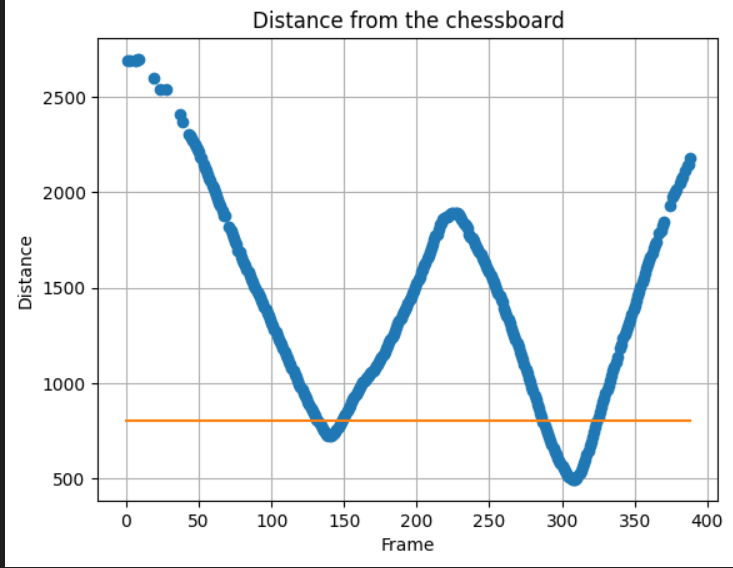

# todo (Results)

# todo (Conclusions and enhancements that can be done)


# References
    [1] Survey on Stereovision Based Disparity Map Using Sum of Absolute Difference - International Journal of Innovative Science and Research Technology by Parvathy B.H. and Deepambika V.A.
    chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://ijisrt.com/wp-content/uploads/2018/01/Survey-on-Stereovision-Based-Disparity-Map-Using-Sum-of-Absolute-Difference.pdf
# todo
